Computing current: 100%|██████████| 2000/2000 [00:00<00:00, 210769.05it/s]


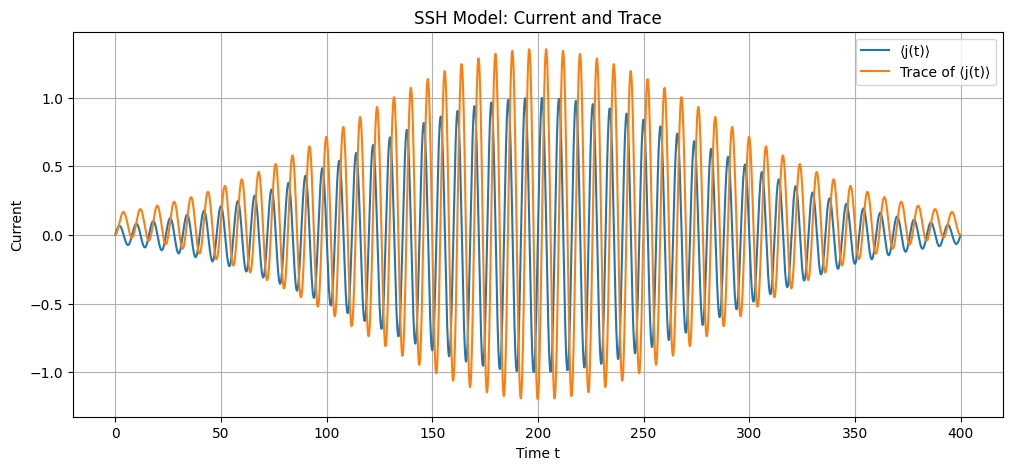

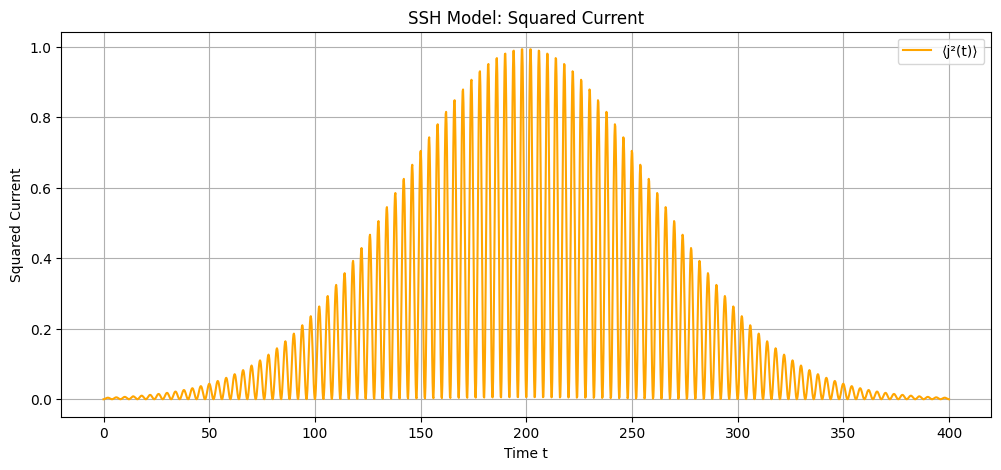

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
Nc = 10
omega0 = np.pi / (2 * Nc)
T = 2 * np.pi * Nc / omega0
steps = 2000
t = np.linspace(0, T, steps)

# Driving field A(t)
A = 0.5 * np.sin(omega0 * t) * (np.sin(omega0 * t / (2 * Nc)))**2

current = np.zeros_like(t)

# Compute current with progress bar
for i in tqdm(range(steps), desc="Computing current"):
    current[i] = np.sin(5 * omega0 * t[i]) * np.exp(-((t[i] - T/2) / (0.3 * T))**2)

# Compute squared current
current_sq = current**2

# Compute cumulative trace of current (not squared)
trace_current = np.cumsum(current) * (t[1] - t[0])  # simple integration

# Plot current and its trace
plt.figure(figsize=(12,5))
plt.plot(t, current, label="⟨j(t)⟩")
plt.plot(t, trace_current, label="Trace of ⟨j(t)⟩")
plt.xlabel("Time t")
plt.ylabel("Current")
plt.title("SSH Model: Current and Trace")
plt.legend()
plt.grid(True)
plt.show()

# Plot squared current
plt.figure(figsize=(12,5))
plt.plot(t, current_sq, label="⟨j²(t)⟩", color='orange')
plt.xlabel("Time t")
plt.ylabel("Squared Current")
plt.title("SSH Model: Squared Current")
plt.legend()
plt.grid(True)
plt.show()
